In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi
from utils import plot_simplices, get_adjacency_simplex_tree

In [2]:
SHAPE_PATH = "dataset/shapefiles/025-imperial.shp"
VOTES_PATH = "dataset/final-results/025-imperial.csv"

shapes_gdf = gpd.read_file(SHAPE_PATH)
votes_df = pd.read_csv(VOTES_PATH)

In [3]:
shapes_gdf = shapes_gdf.set_index('pct16').drop('area', axis=1)
votes_df = votes_df.set_index('pct16')[['pres_clinton', 'pres_trump']]
gdf = shapes_gdf.join(votes_df)

In [4]:
def delta(votes_clinton, votes_trump):
    sum_votes = votes_clinton + votes_trump
    if sum_votes == 0:
        return 0
    
    return abs(votes_clinton - votes_trump)/sum_votes

In [5]:
gdf = gdf[gdf['pres_clinton'] < gdf['pres_trump']]
pct_id_to_vert = {}
vert_to_pct_id = [None] * len(gdf)
vert = 0
for index, row in gdf.iterrows():
    gdf.at[index, 'delta'] = delta(row['pres_clinton'], row['pres_trump'])
    pct_id_to_vert[index] = vert
    vert_to_pct_id[vert] = index
    vert += 1

In [6]:
simplex_tree = get_adjacency_simplex_tree(gdf, pct_id_to_vert)

In [7]:
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

[24] -> 0.05
[34] -> 0.05
[40] -> 0.05
[41] -> 0.05
[47] -> 0.05
[50] -> 0.05
[45] -> 0.35
[49] -> 0.35
[34, 49] -> 0.35
[41, 49] -> 0.35
[18] -> 0.40
[32] -> 0.40
[37] -> 0.45
[18, 37] -> 0.45
[14] -> 0.50
[15] -> 0.50
[28] -> 0.50
[14, 28] -> 0.50
[30] -> 0.50
[38] -> 0.50
[17] -> 0.55
[14, 17] -> 0.55
[25] -> 0.55
[17, 28] -> 0.55
[14, 17, 28] -> 0.55
[35] -> 0.55
[27] -> 0.60
[39] -> 0.60
[34, 39] -> 0.60
[13] -> 0.65
[48] -> 0.65
[25, 48] -> 0.65
[28, 48] -> 0.65
[44] -> 0.70
[44, 45] -> 0.70
[2] -> 0.75
[5] -> 0.75
[6] -> 0.75
[8] -> 0.75
[11] -> 0.75
[22] -> 0.75
[14, 22] -> 0.75
[17, 22] -> 0.75
[14, 17, 22] -> 0.75
[31] -> 0.75
[2, 38] -> 0.75
[8, 45] -> 0.75
[3] -> 0.80
[3, 38] -> 0.80
[42] -> 0.80
[11, 42] -> 0.80
[13, 42] -> 0.80
[18, 42] -> 0.80
[43] -> 0.80
[6, 43] -> 0.80
[30, 43] -> 0.80
[0] -> 0.85
[7] -> 0.85
[5, 7] -> 0.85
[12] -> 0.85
[11, 12] -> 0.85
[20] -> 0.85
[18, 20] -> 0.85
[21] -> 0.85
[0, 22] -> 0.85
[23] -> 0.85
[29] -> 0.85
[3, 29] -> 0.85
[15, 29] -> 0.8

In [8]:
gdf['centroid'] = gdf.to_crs('epsg:3785').centroid.to_crs(gdf.crs)
points = [[x, y] for x, y in zip(gdf['centroid'].values.x, gdf['centroid'].values.y)]

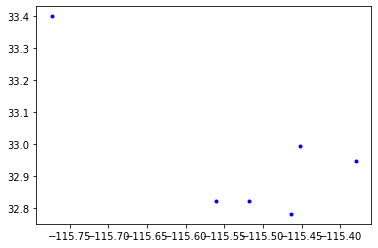

In [9]:
plot_simplices(points, simplex_tree, 0.06)

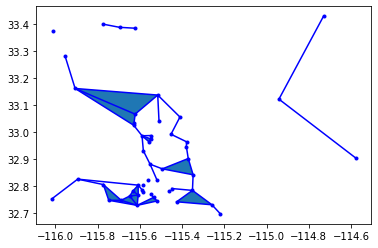

In [10]:
plot_simplices(points, simplex_tree, 2)